Descriptive statistics

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [341]:
data = pd.read_csv('mypersonality_final.csv', encoding = 'ansi')

Total number of users – user-level stats

In [342]:
print('# users :', len(data['#AUTHID'].unique()))
print('# updates :', len(data))

# users : 250
# updates : 9917


In [343]:
stats_per_user = []
for user in data['#AUTHID'].unique():
    stats_per_user.append([user, len(data[data['#AUTHID'] == user])])
stats_per_user_df = pd.DataFrame(stats_per_user, columns=['user','posts'])

In [344]:
print('Mean:\t', stats_per_user_df.posts.mean())
print('Median:\t', stats_per_user_df.posts.median())
print('Min:\t', stats_per_user_df.posts.min())
print('Max:\t', stats_per_user_df.posts.max())
print('Std:\t', stats_per_user_df.posts.std())

Mean:	 39.668
Median:	 25.0
Min:	 1
Max:	 223
Std:	 43.55587483832376


In [360]:
# Cumulative per user
def draw_cumulative(df, percent_users=False, percent_x=False, ylabel='users'):
    counted = df.groupby(df.columns[1], as_index=False).count()
    str_users = "  "
    str_x = "  "
    if (percent_users):
        str_users = "%"
        counted[df.columns[0]] /= counted[df.columns[0]].sum() # percentage
    if (percent_x):
        str_x = "%"
        counted[df.columns[1]] /= counted[df.columns[1]].sum() # percentage
    
    counted[counted.columns[1]] = np.cumsum(counted[counted.columns[1]])
    
    print(counted)
    
    plt.figure(figsize=(9,5))
    plt.plot(counted[counted.columns[0]], counted[counted.columns[1]])
    plt.xlabel(df.columns[1])
    plt.ylabel(ylabel)
    plt.show()

## Number of status updates per user

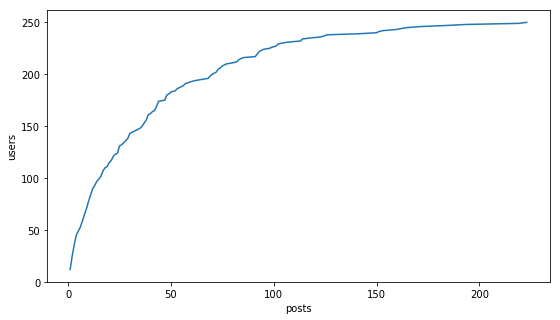

In [359]:
draw_cumulative(stats_per_user_df)

In [361]:
## Number of characters per status message
aa = data[['STATUS','STATUS']]
aa.columns = ['characters', 'posts']
aa['characters'] = aa['characters'].apply(lambda x: len(x))

C:\Users\vesel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [362]:
draw_cumulative(aa)

                                                  posts  characters
0     !!!  Thank you everyone (times a lot) for the ...           1
1     " A teenage vow in a parking lot, till tonight...           2
2     ""All that is necessary for the triumph of evi...           3
3     "*PROPNAME* Teaches Trying?" *PROPNAME*, somet...           4
4     "*PROPNAME* could never have Superman's baby. ...           5
5     "*PROPNAME*" and "*PROPNAME*" are my two middl...           6
6        "... and then I have a witty response." -House           7
7     "... it's a very dangerous time, the coalition...           8
8     "...For you, my child, shall be called the pro...           9
9     "...gonna move from Blogger to Wordpress soon..."          10
10                           "...is hating this job..."          11
11           "...life sucks...but god is still good..."          12
12                      "...moved. now at Wordpress..."          13
13    "...the event marked a major shift, what I

ValueError: 
I get $$$$
      ^
Expected end of text (at char 6), (line:1, col:7)

<Figure size 648x360 with 1 Axes>

## Network Size
## Betweenness centrality

In [322]:
#data